# Sprint 8 : Tasca M9 T01

### Exercici 1
#### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [224]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

https://www.supersummary.com/one-hundred-years-of-solitude/summary/

In [225]:
text=""" One Hundred Years of Solitude tells the story of five generations of the Buendía family from the founding of both their lineage and the town
of Macondo until both are wiped out by a hurricane. The novel is written in third-person omniscient past tense. Time shifts constantly: chapters are
narrated out of chronological order, and the relative importance of events has little relation to how much attention they receive on the page.
Rather than following a single protagonist through a linear set of events, the novel contains many plots and subplots revolving around both the
central characters of the Buendía family across generations and the side characters who interact with them.

The book opens as Colonel Aureliano Buendía remembers his childhood in Macondo, when his father José Arcadio Buendía was interested in all of the
inventions brought to town by travelers. Subsequently, José Arcadio Buendía experiments with new inventions, including alchemy and the astrolabe. 
Úrsula Iguaràn, his wife and the Buendía matriarch, becomes frustrated with his behavior and his preoccupation with tinkering over more practical 
projects. 

Úrsula Iguaràn and José Arcadio Buendía have three children: Colonel Aureliano Buendía, José Arcadio, and Amaranta. Colonel Aureliano Buendía lives
a vibrant and exciting life as a Liberal general during wartime: he fights for Colombian independence from the Conservative government, and only stops
fighting when it's time for an armistice. He has 17 children by women he meets on his military campaigns, and he spends his retirement making tiny
gold fishes in the Buendía house. José Arcadio is the father of Arcadio with Pilar Ternera; when she is pregnant he leaves to become a sailor. He
briefly returns, hale and hearty; while he is in Macondo he marries Rebeca and stops the execution of his brother the Colonel. Amaranta outlasts
her brothers; she dies single and unhappy at home. 

Arcadio has three children with Santa Sofía de Piedad: Remedios the Beauty, Aureliano Segundo, and José Arcadio Segundo. Arcadio dies after becoming
a dictatorial ruler of Macondo; Santa Sofía retreats to the background for a few decades and then leaves Macondo to live with a cousin. Remedios the
Beauty lives a short but mysterious life before she ascends into the sky. José Arcadio Segundo develops purpose to his life as a leader of a workers'
strike at a banana company that is exploiting the people of Macondo; he is the sole survivor of a massacre of those same workers. 

Aureliano Segundo marries Fernanda del Carpio and takes Petra Cotes as a lover. Aureliano Segundo and Fernanda del Carpio have three children:
Renata Remedios (Meme), José Arcadio, and Amaranta Úrsula. Meme falls in love with a mechanic, and Fernanda sends her to a convent; a nun drops her
son Aureliano off later that year. José Arcadio goes to religious school and meets the Pope before coming home to be murdered by teens in his bed for
gold. Amaranta Úrsula is educated in Europe and returns to Macondo with her Belgian husband, Gaston; they are not completely happy together. When 
Gaston returns to Europe, Amaranta Úrsula begins a sexual relationship with her nephew, Aureliano, with whom she has the final child of the Buendía
family. 

At the end of the novel, Macondo and the Buendía family home have fallen into ruin. The child of Amaranta Úrsula and Aureliano is born with a pig’s
tail because it is the product of incest, the fulfillment of an omen that appeared in the first generation of the Buendía family. Amaranta Úrsula 
dies in childbirth, and Aureliano takes the infant into the town square, where he drinks and loses the child. Later, he finds it being devoured by 
ants. He returns to the crumbling Buendía home, where he decodes the ancient writings of the wanderer Melquíades. As he reads the parchments, he 
realizes that the writings have predicted all of the events that have befallen the Buendía family. A windstorm rises as he is reading, and as he 
reads the last line, the storm wipes Macondo off the face of the earth. """

In [226]:
from nltk.tokenize import word_tokenize

# break the text into words
token_word = word_tokenize(text)

# remove punctuation
token_word = [word for word in token_word if word.isalnum()]

In [227]:
from nltk.probability import FreqDist

word_freq = FreqDist(token_word)
word_freq

FreqDist({'the': 48, 'and': 28, 'of': 26, 'a': 20, 'Buendía': 15, 'he': 14, 'to': 12, 'with': 12, 'Arcadio': 12, 'is': 10, ...})

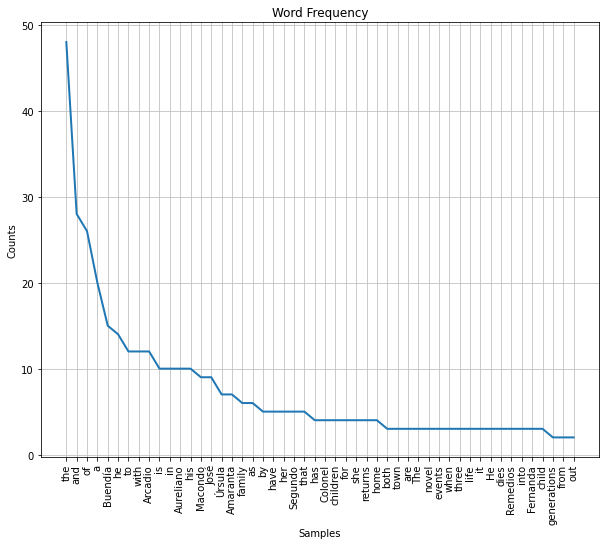

In [249]:
#plotting the word frequency
plt.figure(figsize = (10, 8))
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Counts")
word_freq.plot(50, cumulative = False)
plt.show()

* Las palabras con mayor frecuencia son: the,and, of, a, etc..., seguidas de los nombres de los personajes del libro, Buendía, Arcadio, Aureliano, Macondo, etc...

### Exercici 2
#### Treu les stopwords i realitza stemming al teu conjunt de dades.

### 2.1 Stopwords

* Es una metodología para ignorar las palabras vacías o palabra de uso común (como "el", "un", "una", "en", etc.. ) en un motor de búsqueda , tanto al indexar entradas para la búsqueda como al recuperarlas como resultado final.

In [229]:
from nltk.corpus import stopwords

#import english stopwords
stop_words = list(stopwords.words("english"))

In [230]:
tokenized_sent = token_word
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_sent)
print("")
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['One', 'Hundred', 'Years', 'of', 'Solitude', 'tells', 'the', 'story', 'of', 'five', 'generations', 'of', 'the', 'Buendía', 'family', 'from', 'the', 'founding', 'of', 'both', 'their', 'lineage', 'and', 'the', 'town', 'of', 'Macondo', 'until', 'both', 'are', 'wiped', 'out', 'by', 'a', 'hurricane', 'The', 'novel', 'is', 'written', 'in', 'omniscient', 'past', 'tense', 'Time', 'shifts', 'constantly', 'chapters', 'are', 'narrated', 'out', 'of', 'chronological', 'order', 'and', 'the', 'relative', 'importance', 'of', 'events', 'has', 'little', 'relation', 'to', 'how', 'much', 'attention', 'they', 'receive', 'on', 'the', 'page', 'Rather', 'than', 'following', 'a', 'single', 'protagonist', 'through', 'a', 'linear', 'set', 'of', 'events', 'the', 'novel', 'contains', 'many', 'plots', 'and', 'subplots', 'revolving', 'around', 'both', 'the', 'central', 'characters', 'of', 'the', 'Buendía', 'family', 'across', 'generations', 'and', 'the', 'side', 'characters', 'who', 'interact', 

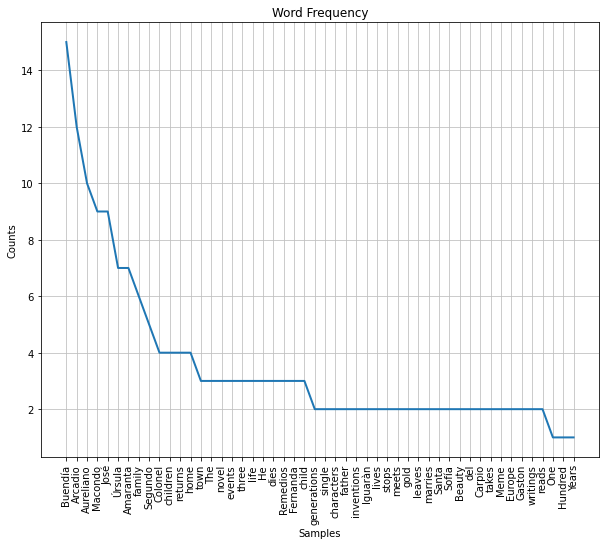

In [250]:
word_freq_stemmed = FreqDist(filtered_sent)

#plotting the word frequency
plt.figure(figsize = (10, 8))
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Counts")
word_freq_stemmed.plot(50, cumulative = False)
plt.show()

* Una vez eliminadas las stopwords, las palabras con mayor frecuencia son los nombres de los personajes del libro, como era previsible, Buendía, Arcadio, Aureliano, Macondo, José, etc..

### 2.2 Normalización de Léxico: Stemming

* Es un proceso de normalización lingüística, que reduce las palabras a su raíz o elimina los afijos derivativos. Por ejemplo, conexión, conectado, palabra de conexión se reduce a una palabra común "conectar".

In [235]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print(" ")
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['One', 'Hundred', 'Years', 'Solitude', 'tells', 'story', 'five', 'generations', 'Buendía', 'family', 'founding', 'lineage', 'town', 'Macondo', 'wiped', 'hurricane', 'The', 'novel', 'written', 'omniscient', 'past', 'tense', 'Time', 'shifts', 'constantly', 'chapters', 'narrated', 'chronological', 'order', 'relative', 'importance', 'events', 'little', 'relation', 'much', 'attention', 'receive', 'page', 'Rather', 'following', 'single', 'protagonist', 'linear', 'set', 'events', 'novel', 'contains', 'many', 'plots', 'subplots', 'revolving', 'around', 'central', 'characters', 'Buendía', 'family', 'across', 'generations', 'side', 'characters', 'interact', 'The', 'book', 'opens', 'Colonel', 'Aureliano', 'Buendía', 'remembers', 'childhood', 'Macondo', 'father', 'José', 'Arcadio', 'Buendía', 'interested', 'inventions', 'brought', 'town', 'travelers', 'Subsequently', 'José', 'Arcadio', 'Buendía', 'experiments', 'new', 'inventions', 'including', 'alchemy', 'astrolabe', 'Úrsula',

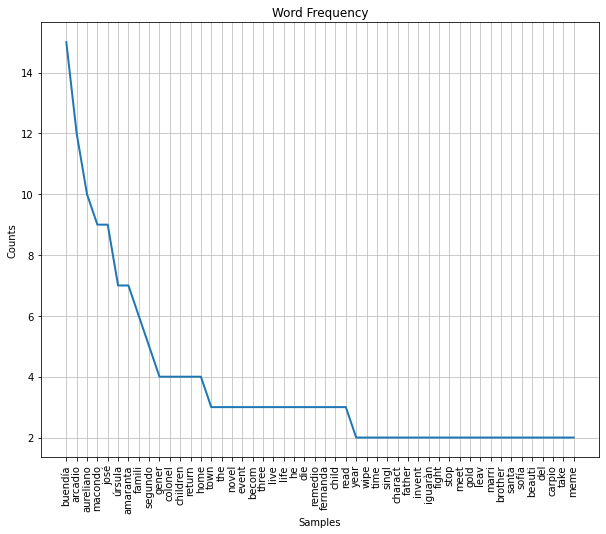

In [251]:
word_freq_stemmed = FreqDist(stemmed_words)

#plotting the word frequency
plt.figure(figsize = (10, 8))
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Counts")
word_freq_stemmed.plot(50, cumulative = False)
plt.show()

* El gráfico muestra que las palabras más frecuentes siguen siendo los nombres de los protagonistas del libro y se ha  eliminado algunas de las que aparecian en el gráfico anterior después del steamming.

### Exercici 3
#### Realitza sentiment analysis al teu conjunt de dades.

In [252]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [253]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hecto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 3.1 Sentiment Analysis con SentimentIntensityAnalyzer():

In [254]:
# sentiment of the original text
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(text)

{'neg': 0.057, 'neu': 0.896, 'pos': 0.048, 'compound': -0.7369}

SentimentIntensityAnalyzer() es una función que nos proporciona polarity_scores, que es un método que facilita las puntuaciones para las siguientes categorías:

* Negativo
* Neutral
* Positivo
* Compuesto

La puntuación compuesta es la suma de puntuaciones positivas, negativas y neutras, normalizadas entre -1 (negativo más extremo) y +1 (positivo más extremo).

In [255]:
sent_dict = sentiment.polarity_scores(text)
print(type(sent_dict))

<class 'dict'>


In [256]:
def sent_score(): 
    
    if sent_dict['compound'] >= 0.05 :
        return 'Positive'
    elif sent_dict['compound'] <= - 0.05 :
        return 'Negative'
    else :
        return 'Neutral'

result = sent_score()

print("Overall text is : ", sent_dict)
print("Text was rated as ", sent_dict['neg']*100, "% Negative")
print("Text was rated as ", round(sent_dict['neu']*100,1), "% Neutral")
print("Text was rated as ", sent_dict['pos']*100, "% Positive")

print("The overall text was rated as",result, "with a score of", sent_dict['compound']*100, "% Compound")

Overall text is :  {'neg': 0.057, 'neu': 0.896, 'pos': 0.048, 'compound': -0.7369}
Text was rated as  5.7 % Negative
Text was rated as  89.6 % Neutral
Text was rated as  4.8 % Positive
The overall text was rated as Negative with a score of -73.69 % Compound


### 3.2 Sentiment Analysis de las frases individuales del texto:

In [257]:
# first we split the text into sentences 
sentences = nltk.sent_tokenize(text)

In [258]:
# we apply Sentiment analysis individually on each sentence of the text 
control=0
resultados=pd.DataFrame()

for sentence in sentences: 
    control=control+1
    sentiment = SentimentIntensityAnalyzer()
    print( "Sentencia número ", control,":", end="")
    scores = sentiment.polarity_scores(sentence)
    print (scores)
    
    resul= pd.DataFrame.from_dict(scores, orient='index') 
    resultados = resultados.append(resul, ignore_index=False)
   
    print('')


Sentencia número  1 :{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentencia número  2 :{'neg': 0.205, 'neu': 0.598, 'pos': 0.197, 'compound': -0.0258}

Sentencia número  3 :{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.3612}

Sentencia número  4 :{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.3182}

Sentencia número  5 :{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.4019}

Sentencia número  6 :{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentencia número  7 :{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.5267}

Sentencia número  8 :{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentencia número  9 :{'neg': 0.168, 'neu': 0.668, 'pos': 0.163, 'compound': 0.2023}

Sentencia número  10 :{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentencia número  11 :{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentencia número  12 :{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'compound': -0.1531}

Sentencia número  13 :{'neg': 0

In [259]:
resultados['index']=resultados.index

In [260]:
resultados.columns=['valores','score_sentiment']
resultados.columns

Index(['valores', 'score_sentiment'], dtype='object')

In [261]:
status= resultados.groupby("score_sentiment")[["valores"]].sum()
status

,valores
score_sentiment,
compound,-0.0078
neg,1.6150
neu,26.8520
pos,1.5320


<AxesSubplot:ylabel='score_sentiment'>

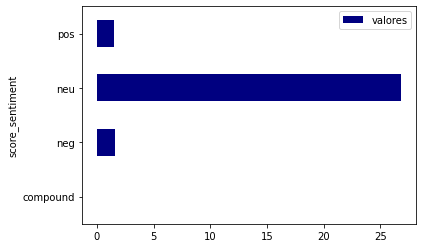

In [262]:
status.plot(kind="barh", color="navy")

* La suma de los varores de cada una de las 30 sentencias regleja que en general el texto es neutro, y que las puntuaciones positivas y negativas se compensan, por lo que el "compound" global es -0.0078

### 3.3 Sentiment Analysis a partir del léxico con TextBlob:

* El segundo enfoques para el análisis de sentimiento se basa en el léxico y ea un modelo de de aprendizaje no supervisado. En los análisis anteriores necesitamos datos preetiquetados, pero el segundo no, lo cual es una ventaja.
* Textblob es una biblioteca utilizada para NLP (Natural Language Processing) que tiene diccionarios especiales (léxico) con información detallada, especialmente precisa y preparada para el análisis de sentimientos. Estos léxicos tienen una lista de palabras polares positivas y negativas con una puntuación asociada y usando varias técnicas, como la posición de las palabras, las palabras circundantes, el contexto, las partes del discurso, frases, etc., se asignan puntuaciones a los texto para el que queremos calcular el sentimiento, la suma total es el sentimiento final del texto.

In [263]:
from textblob import TextBlob
sent = TextBlob(text)
print(sent.sentiment)

Sentiment(polarity=0.02462876271015806, subjectivity=0.3963127957314004)


* La polaridad es una métrica utilizada para estimar el sentimiento general de un texto y varía de -1 a 1, donde -1 sería completamente negativo, 0 es neutral y 1 es completamente positivo. En este caso, está muy cerca de 0, por lo que el sentimiento general es neutral.

* La subjetividad es una métrica que va de 0 a 1, donde 0 es muy objetivo y 1 es muy subjetivo. En este caso está más próximo a la objetividad, 0.39, al tratarse de una narración donde el autor no tiene, evidentemente una opinioón o posición personal.